In [84]:
import json
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
pd.set_option('display.max_colwidth', 100)

In [3]:
# Read the csv files containin gthe tweets by Eon Musk from 2010 to 2022.
df_2010 = pd.read_csv('elon_musk/2010.csv')
df_2011 = pd.read_csv('elon_musk/2011.csv')
df_2012 = pd.read_csv('elon_musk/2012.csv')
df_2013 = pd.read_csv('elon_musk/2013.csv')
df_2014 = pd.read_csv('elon_musk/2014.csv')
df_2015 = pd.read_csv('elon_musk/2015.csv')
df_2016 = pd.read_csv('elon_musk/2016.csv')
df_2017 = pd.read_csv('elon_musk/2017.csv')
df_2018 = pd.read_csv('elon_musk/2018.csv')
df_2019 = pd.read_csv('elon_musk/2019.csv')
df_2020 = pd.read_csv('elon_musk/2020.csv')
df_2021 = pd.read_csv('elon_musk/2021.csv')
df_2022 = pd.read_csv('elon_musk/2022.csv')

In [4]:
print(f"shape of 2010 df: " + str(df_2010.shape))
print(f"shape of 2011 df: " + str(df_2012.shape))
print(f"shape of 2012 df: " + str(df_2012.shape))
print(f"shape of 2013 df: " + str(df_2013.shape))
print(f"shape of 2014 df: " + str(df_2014.shape))
print(f"shape of 2015 df: " + str(df_2015.shape))
print(f"shape of 2016 df: " + str(df_2016.shape))
print(f"shape of 2017 df: " + str(df_2017.shape))
print(f"shape of 2018 df: " + str(df_2018.shape))
print(f"shape of 2019 df: " + str(df_2019.shape))
print(f"shape of 2020 df: " + str(df_2020.shape))
print(f"shape of 2021 df: " + str(df_2021.shape))
print(f"shape of 2022 df: " + str(df_2022.shape))

shape of 2010 df: (1, 39)
shape of 2011 df: (313, 39)
shape of 2012 df: (313, 39)
shape of 2013 df: (737, 39)
shape of 2014 df: (923, 39)
shape of 2015 df: (1253, 39)
shape of 2016 df: (2000, 39)
shape of 2017 df: (3167, 39)
shape of 2018 df: (2285, 39)
shape of 2019 df: (8312, 39)
shape of 2020 df: (11717, 39)
shape of 2021 df: (3115, 36)
shape of 2022 df: (1028, 36)


### From the above o/p I see that all the dataframes have the same number of columns (39) except for 2021 and 2022 (36). 

In [5]:
df_2010.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [6]:
df_2022.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df_tweets = pd.concat([df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022],axis = 0)

In [8]:
df_tweets.shape

(34878, 44)

In [9]:
df_tweets.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,15434727182,15434727182,1275676317000.0,2010-06-04 18:31:57,0,NaN,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,152153637639028736,152151847614943233,1325111228000.0,2011-12-28 22:27:08,0,NaN,@TheOnion So true :),en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,151809315026636800,151809315026636800,1325029135000.0,2011-12-27 23:38:55,0,NaN,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,151338939389706242,151338939389706242,1324916990000.0,2011-12-26 16:29:50,0,NaN,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,151337237429239808,151337237429239808,1324916584000.0,2011-12-26 16:23:04,0,NaN,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",en,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34878 entries, 0 to 1027
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30735 non-null  float64
 1   id               34878 non-null  int64  
 2   conversation_id  34878 non-null  int64  
 3   created_at       34878 non-null  object 
 4   date             34878 non-null  object 
 5   timezone         34878 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            34878 non-null  object 
 8   language         34878 non-null  object 
 9   hashtags         34878 non-null  object 
 10  cashtags         34878 non-null  object 
 11  user_id          34878 non-null  int64  
 12  user_id_str      30735 non-null  float64
 13  username         34878 non-null  object 
 14  name             34878 non-null  object 
 15  day              30735 non-null  float64
 16  hour             30735 non-null  float64
 17  link         

In [11]:
df_tweets["hashtags"].value_counts()

[]                               34608
['dragonlaunch']                    48
['dragon']                          47
['apspacechat']                     16
['sxsw']                            14
['occupymars']                      11
['falconheavy']                      9
['awesomexmasgifts']                 8
['climate']                          8
['grasshopperproject']               8
['occupymars', 'apspacechat']        8
['antarctica']                       8
['plutostamp']                       8
['whatcouldpossiblygowrong']         8
['zeitgeist2012']                    8
['sb47']                             7
['hhgttg']                           7
['teslatx']                          7
['katiewoodencloak']                 7
['yutu']                             6
['donotpanic']                       3
['throwflamesresponsibly']           3
['pravduh']                          3
['falconheavy', 'spacex']            3
['newprofilepic']                    2
['moneygang']            

In [13]:
df_tweets_new = df_tweets[["date","tweet","retweet","nlikes","nreplies","nretweets","replies_count","retweets_count","likes_count"]]
df_tweets_new.head()

,date,tweet,retweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04 18:31:57,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
0,2011-12-28 22:27:08,@TheOnion So true :),False,12.0,7.0,1.0,NaN,NaN,NaN
1,2011-12-27 23:38:55,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,False,39.0,13.0,34.0,NaN,NaN,NaN
2,2011-12-26 16:29:50,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,False,155.0,9.0,18.0,NaN,NaN,NaN
3,2011-12-26 16:23:04,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",False,158.0,15.0,13.0,NaN,NaN,NaN


In [15]:
#Convert the date column from string to "datetime" column. extracting just the date.
df_tweets_new['date'] = pd.to_datetime(df_tweets_new['date']).dt.date
df_tweets_new.head()

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,tweet,retweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
0,2011-12-28,@TheOnion So true :),False,12.0,7.0,1.0,NaN,NaN,NaN
1,2011-12-27,If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever)...,False,39.0,13.0,34.0,NaN,NaN,NaN
2,2011-12-26,Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k,False,155.0,9.0,18.0,NaN,NaN,NaN
3,2011-12-26,"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. ...",False,158.0,15.0,13.0,NaN,NaN,NaN


In [16]:
# Let us sort the dates in ascending order.
df_tweets_new.sort_values(by=['date'], inplace=True, ascending=True)
df_tweets_new.reset_index(drop=True, inplace=True)
df_tweets_new.head(20)

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,date,tweet,retweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
1,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
2,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
3,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
4,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
5,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
6,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
7,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
8,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
9,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN


#### After sorting the records in ascending order, we see a lot of duplicate records. These duplicate records need to be removed.

In [17]:
#Checking for duplicate records
df_tweets_new[df_tweets_new.duplicated(keep='first')][:10]

,date,tweet,retweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
1,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
2,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
3,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
4,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
5,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
6,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
7,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
8,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
9,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
12,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",False,189.0,32.0,15.0,NaN,NaN,NaN


In [23]:
#Drop duplicate records from the dataframe and reset the index
df_tweets_final = df_tweets_new.drop_duplicates(keep='first')
df_tweets_final.reset_index(drop=True, inplace=True)
df_tweets_final.head(15)

,date,tweet,retweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
1,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys...",False,189.0,32.0,15.0,NaN,NaN,NaN
2,2011-12-01,I made the volume on the Model S http://t.co/wMCnT53M go to 11. Now I just need to work in a m...,False,78.0,31.0,9.0,NaN,NaN,NaN
3,2011-12-03,That was a total non sequitur btw,False,53.0,31.0,6.0,NaN,NaN,NaN
4,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",False,29.0,7.0,25.0,NaN,NaN,NaN
5,2011-12-04,Am reading a great biography of Ben Franklin by Isaacson. Highly recommended.,False,65.0,17.0,9.0,NaN,NaN,NaN
6,2011-12-21,"Got called randomly by Kanye West today and received a download of his thoughts, ranging from sh...",False,1068.0,19.0,546.0,NaN,NaN,NaN
7,2011-12-21,His singing and acting talent will be sorely missed: http://t.co/IIFKob75 South Park sequel co...,False,32.0,6.0,2.0,NaN,NaN,NaN
8,2011-12-21,"Yeah, this really is me, as my Mom @mayemusk will attest. Not sure I can handle just doing 140 c...",False,34.0,11.0,4.0,NaN,NaN,NaN
9,2011-12-21,Yum! Even better than deep fried butter: http://t.co/Ody21NuD,False,10.0,7.0,2.0,NaN,NaN,NaN


In [24]:
print(df_tweets_final.shape)

(17879, 9)


#### After dropping the duplicate records we see that only half of the records remain. Let us no clean the tweets, ie remove all the #,@ symbols. 

In [25]:
#Lets clean the tweets (remove @'s' and urls and)
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
new = []
for t in df_tweets_final.tweet:
    words = t.split()
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('@'))
    t = t.split()
    t = ' '.join(word for word in t if not word.startswith('http'))
    new.append(t)
    
df_tweets_final['tweet'] = new
df_tweets_final

C:\Users\shreh\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,date,tweet,retweet,nlikes,nreplies,nretweets,replies_count,retweets_count,likes_count
0,2010-06-04,"Please ignore prior tweets, as that was someone pretending to be me :) This is actually me.",False,4652.0,391.0,348.0,NaN,NaN,NaN
1,2011-12-01,"Went to Iceland on Sat to ride bumper cars on ice! No, not the country, Vlad's rink in Van Nuys....",False,189.0,32.0,15.0,NaN,NaN,NaN
2,2011-12-01,I made the volume on the Model S go to 11. Now I just need to work in a miniature Stonehenge...,False,78.0,31.0,9.0,NaN,NaN,NaN
3,2011-12-03,That was a total non sequitur btw,False,53.0,31.0,6.0,NaN,NaN,NaN
4,2011-12-03,"Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replie...",False,29.0,7.0,25.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
17874,2022-03-05,"And also my sympathies to the great people of Russia, who do not want this",False,NaN,NaN,NaN,4092.0,14745.0,256908.0
17875,2022-03-05,🇺🇦🇺🇦🇺🇦 Hold Strong Ukraine 🇺🇦🇺🇦🇺🇦,False,NaN,NaN,NaN,9853.0,42711.0,407741.0
17876,2022-03-05,"Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re...",False,NaN,NaN,NaN,4111.0,16195.0,155764.0
17877,2022-03-05,"In a way, this is free QA haha",False,NaN,NaN,NaN,258.0,210.0,4609.0


In [37]:
pd.DatetimeIndex(df_tweets_final["date"]).year

Int64Index([2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='date', length=17879)

### Visualize the nunber of tweets from 2010 to 2022 of Elon Musk

In [65]:
# Get the number of tweets every year by Elon Musk
date_count_df = df_tweets_final.groupby(pd.DatetimeIndex(df_tweets_final["date"]).year)["tweet"].count()
date_count_df = date_count_df.to_frame()
date_count_df

,tweet
date,
2010,1
2011,42
2012,272
2013,422
2014,188
2015,328
2016,754
2017,1170
2018,4579


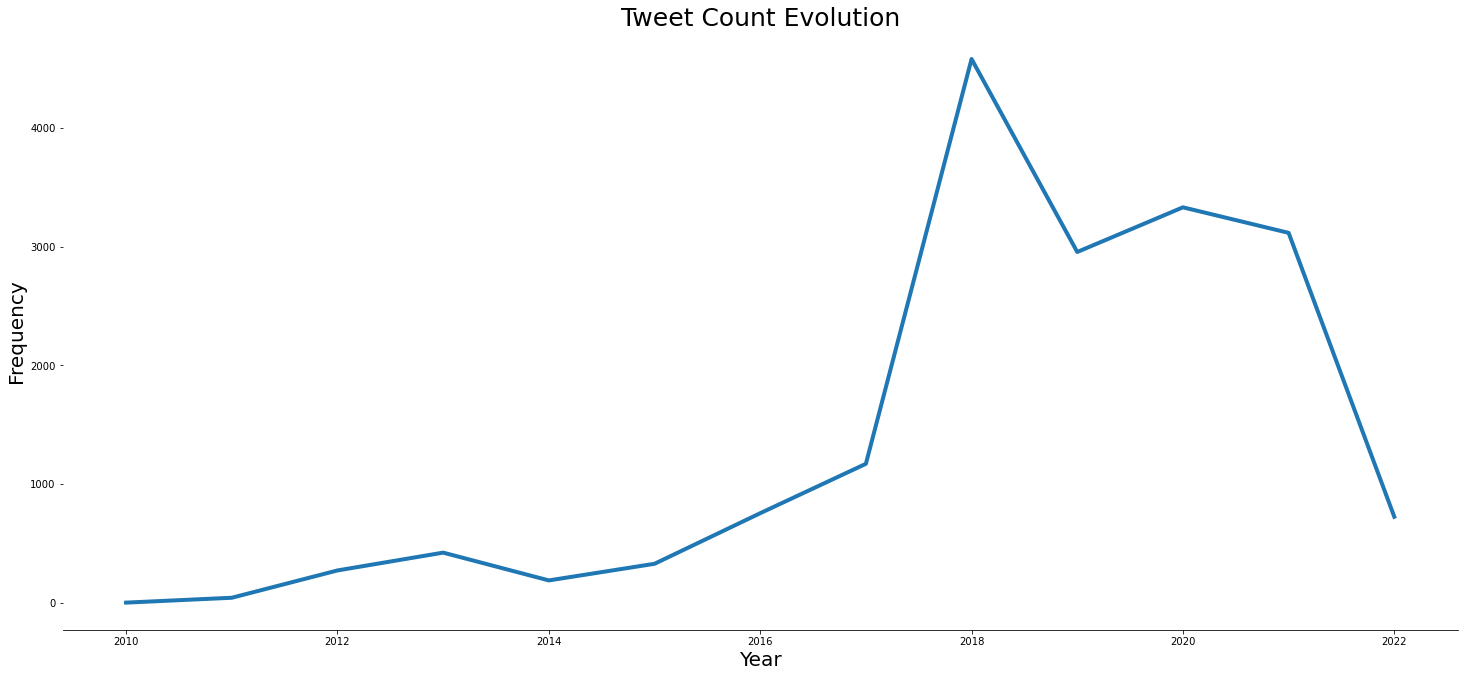

In [72]:
# Plot
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_count_df, x= "date", y= "tweet", lw=4)
plt.title("Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
sns.despine(left=True)

### The number of tweets by Elon Musk kept increasing every year from 2010. Maximum number of tweets were generated in year 2018.

### Filter the tweets containing the word "doge"

In [27]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_doge = pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'doge' in cur:
        df_doge = df_doge.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet}, 
                ignore_index = True)

df_doge['Date'] = pd.to_datetime(df_doge['Date'], format='%Y-%m-%d')
df_doge

,Date,Tweet
0,2019-04-02,Dogecoin value may vary
1,2019-04-02,Dogecoin might be my fav cryptocurrency. It’s pretty cool.
2,2019-04-02,Dogecoin rulz
3,2020-04-25,Dogecoin Mode
4,2020-07-18,"Excuse me, I only sell Doge!"
...,...,...
63,2021-12-14,Tesla will make some merch buyable with Doge &amp; see how it goes
64,2021-12-23,That’s why I’m pro Doge
65,2022-01-14,Tesla merch buyable with Dogecoin
66,2022-01-25,I will eat a happy meal on tv if accepts Dogecoin


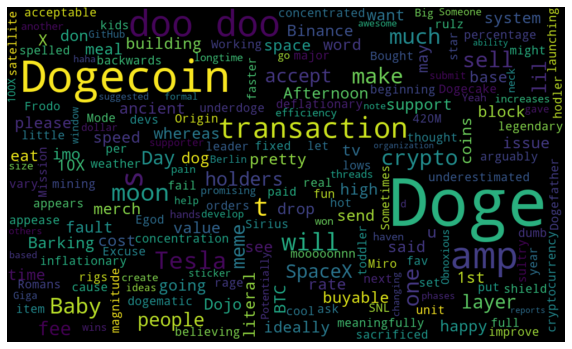

In [85]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_doge["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [70]:
# Get the number of tweets every year by Elon Musk
date_doge_df = df_doge.groupby(pd.DatetimeIndex(df_doge["Date"]).year)["Tweet"].count()
date_doge_df = date_doge_df.to_frame()
date_doge_df

,Tweet
Date,
2019,3
2020,4
2021,58
2022,3


Text(0, 0.5, 'Frequency')

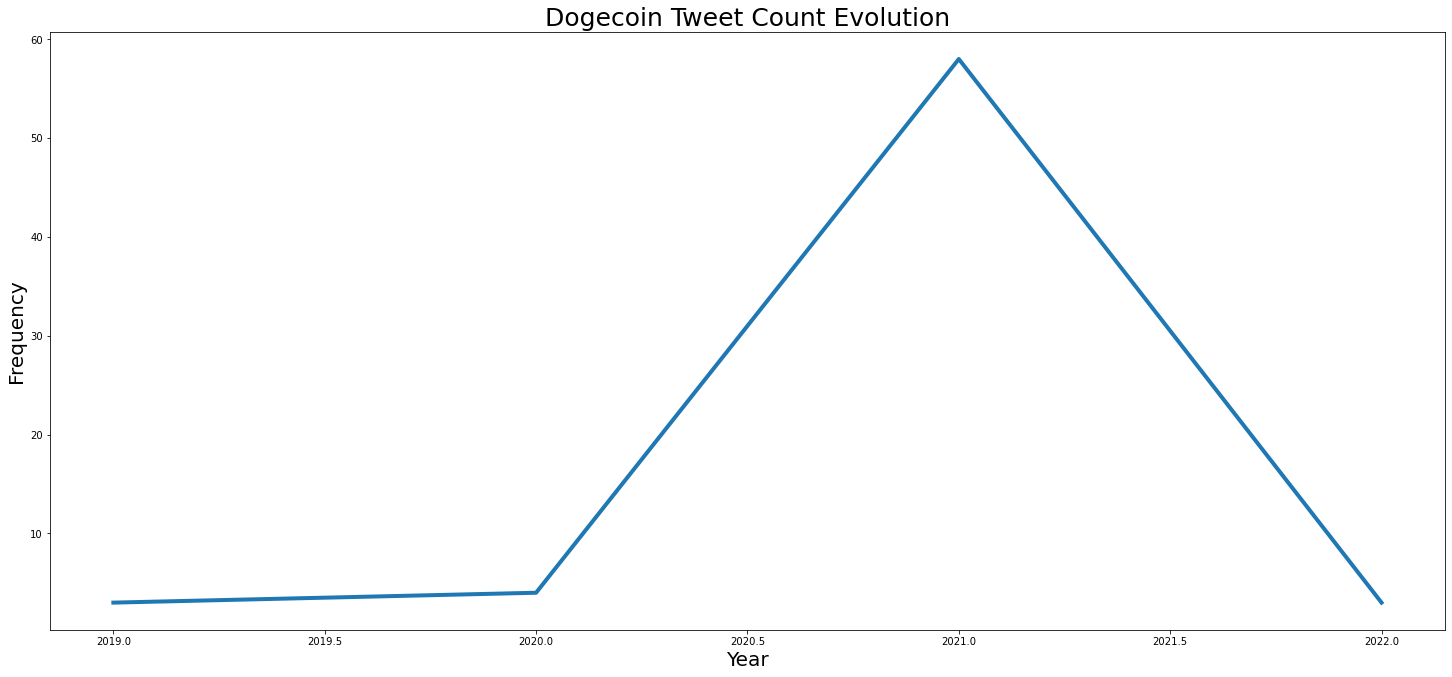

In [74]:
# Plot the number of tweets for dogecoing by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_doge_df, x= "Date", y= "Tweet", lw=4)
plt.title("Dogecoin Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)
# sns.despine(left=True)

### Filter the tweets containing the word "spaceX"

In [30]:
#Filter the spaceX tweets from the df_tweets_final dataset
df_spaceX= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'space' in cur:
        df_spaceX = df_spaceX.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet}, 
                ignore_index = True)

df_spaceX['Date'] = pd.to_datetime(df_spaceX['Date'], format='%Y-%m-%d')
df_spaceX

,Date,Tweet
0,2011-12-24,Kanye stopped by the SpaceX rocket factory today.
1,2011-12-30,China unveils ambitious space strategy
2,2011-12-30,"SpaceX has Boeing, Lockheed, Europe (Ariane) and Russia (Proton/Soyuz) near checkmate in rocket ..."
3,2012-01-06,Next month is also when our Dragon spaceship docks with the Space Station for the first time. Ma...
4,2012-01-24,Design completed for bringing rocket back to launchpad using only thrusters. Yay. Wings r just d...
...,...,...
597,2022-02-25,"LIDAR is a seductive local maximum. SpaceX designed &amp; built them to dock with ISS. However, ..."
598,2022-03-03,Ukraine civilian Internet was experiencing strange outages – bad weather perhaps? – so SpaceX is...
599,2022-03-03,Ukraine civilian Internet was experiencing strange outages – bad weather perhaps? – so SpaceX is...
600,2022-03-05,SpaceX reprioritized to cyber defense &amp; overcoming signal jamming. Will cause slight delays ...


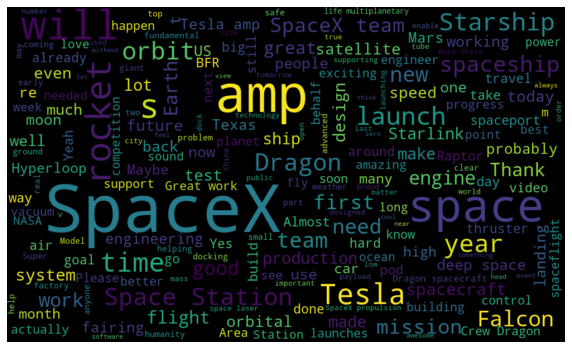

In [87]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_spaceX["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [78]:
# Get the number of tweets every year by Elon Musk
date_spaceX_df = df_spaceX.groupby(pd.DatetimeIndex(df_spaceX["Date"]).year)["Tweet"].count()
date_spaceX_df = date_spaceX_df.to_frame()
date_spaceX_df

,Tweet
Date,
2011,3
2012,39
2013,17
2014,14
2015,24
2016,21
2017,50
2018,139
2019,100


Text(0, 0.5, 'Frequency')

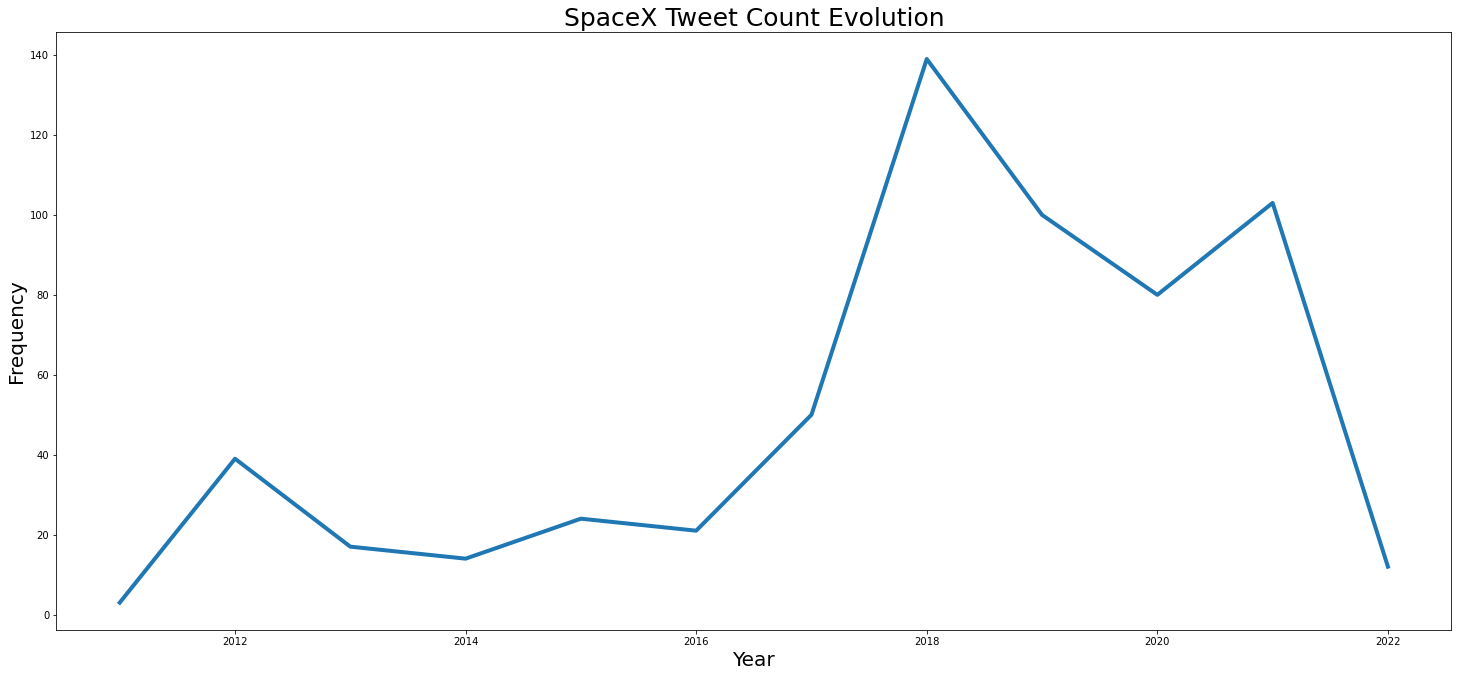

In [80]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_spaceX_df, x= "Date", y= "Tweet", lw=4)
plt.title("SpaceX Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)

### Filter the tweets containing the word "tesla"

In [32]:
#Filter the dogecoin tweets from the df_tweets_new dataset
df_tesla= pd.DataFrame(columns = ['Date', 'Tweet'])

for i in range(len(df_tweets_final)):
    cur = df_tweets_final.loc[i].tweet
    cur = cur.lower()
    if 'tesla' in cur:
        df_tesla = df_tesla.append({'Date' : df_tweets_final.loc[i].date, 'Tweet' : df_tweets_final.loc[i].tweet}, 
                ignore_index = True)

df_tesla['Date'] = pd.to_datetime(df_tesla['Date'], format='%Y-%m-%d')
df_tesla

,Date,Tweet
0,2011-12-31,Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrong
1,2012-01-11,"The exec conf room at Tesla used to be called Denali, but I decided to move a few letters around..."
2,2012-01-13,"A Tesla Roadster just passed the 100,000 mile mark for the first time and still has over 200 mil..."
3,2012-01-17,That's not just paranoia (a healthy trait at times). Tesla really is under massive attack by sho...
4,2012-01-17,Will communicate better in the future. Too many people want us to fail and are willing to twist ...
...,...,...
1481,2022-03-03,"By the way, Tesla factory worker compensation is the highest in the auto industry"
1482,2022-03-03,This old YouTube clip helps explain why former UAW members who work at Tesla are not huge fans o...
1483,2022-03-03,"Our real challenge is Bay Area has negative unemployment, so if we don’t treat and compensate ou..."
1484,2022-03-05,"Obviously, this would negatively affect Tesla, but sustainable energy solutions simply cannot re..."


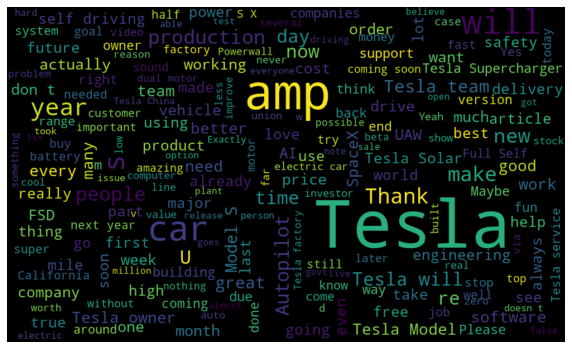

In [86]:
plt.figure(figsize=(10,8))
allWords = ' '.join([twts for twts in df_tesla["Tweet"]])
wordCloud = WordCloud(width = 1000, height = 600, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [81]:
# Get the number of tweets every year by Elon Musk
date_tesla_df = df_tesla.groupby(pd.DatetimeIndex(df_tesla["Date"]).year)["Tweet"].count()
date_tesla_df = date_tesla_df.to_frame()
date_tesla_df

,Tweet
Date,
2011,1
2012,30
2013,69
2014,29
2015,25
2016,80
2017,71
2018,505
2019,246


Text(0, 0.5, 'Frequency')

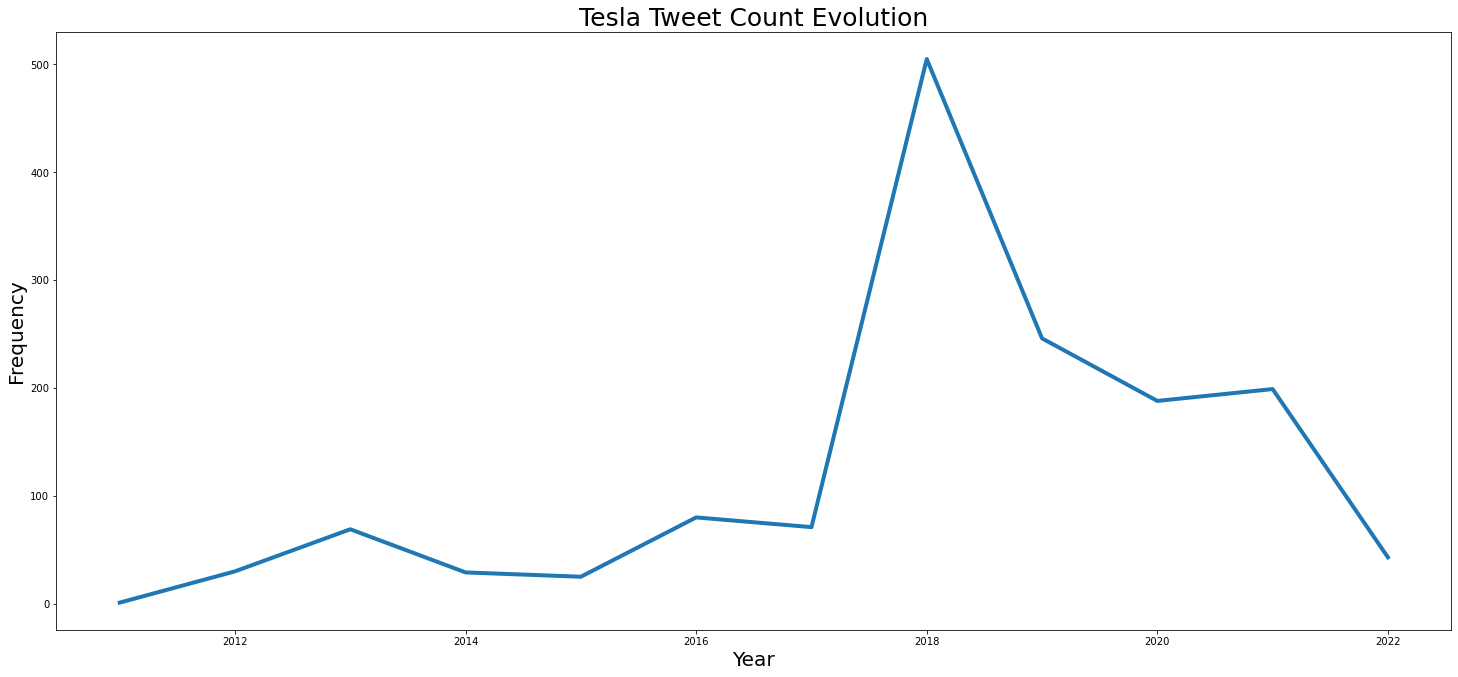

In [88]:
# Plot the number of tweets for spaceX by elon musk
plt.figure(figsize=(25, 11))
ax = sns.lineplot(data=date_tesla_df, x= "Date", y= "Tweet", lw=4)
plt.title("Tesla Tweet Count Evolution", size=25)
plt.xlabel("Year", size=20)
plt.ylabel("Frequency", size=20)